### Fetching Data

In [6]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt -O ./data/irish_poem.txt

--2020-09-25 19:32:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4002:807::2010, 2404:6800:4002:808::2010, 2404:6800:4002:803::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4002:807::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘./data/irish_poem.txt’

./data/irish_poem.t 100%[===================>]  67.35K   328KB/s    in 0.2s    

2020-09-25 19:32:52 (328 KB/s) - ‘./data/irish_poem.txt’ saved [68970/68970]



### Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM,Bidirectional,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Getting Data Ready

In [2]:
data=open('./data/irish_poem.txt','r').read()

In [3]:
corpus=data.lower().split("\n")

#### Tokenizing data

In [4]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

In [5]:
total_words

2690

#### Turning data into Sequential data for Training

In [6]:
sequences=[]
for sentence in corpus:
    token=tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1,len(token)):
        sequences.append(token[:i+1])

In [7]:
max_length=max([len(seq) for seq in sequences]) #getting max sequence length

In [8]:
max_length

16

In [9]:
#padding the sequence to max length
final_sequences=np.array(pad_sequences(sequences,maxlen=max_length,padding='pre'))

#### Splitting into x sequences and onehot encoded labels

In [10]:
xs=final_sequences[:,:-1]
labels=final_sequences[:,-1]

In [11]:
#One hot encoding labels
ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)

## Creating Model

In [12]:
model=tf.keras.Sequential()
model.add(Embedding(total_words,100,input_length=max_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(xs,ys,epochs=100)

Epoch 1/100
377/377 [==============================] - 4s 12ms/step - loss: 1.0069 - accuracy: 0.7456
Epoch 2/100
377/377 [==============================] - 4s 12ms/step - loss: 0.9119 - accuracy: 0.7652
Epoch 3/100
377/377 [==============================] - 4s 12ms/step - loss: 0.8512 - accuracy: 0.7811
Epoch 4/100
377/377 [==============================] - 4s 12ms/step - loss: 0.8236 - accuracy: 0.7884
Epoch 5/100
377/377 [==============================] - 4s 12ms/step - loss: 0.8626 - accuracy: 0.7748
Epoch 6/100
377/377 [==============================] - 4s 12ms/step - loss: 0.9709 - accuracy: 0.7438
Epoch 7/100
377/377 [==============================] - 4s 12ms/step - loss: 1.0432 - accuracy: 0.7236
Epoch 8/100
377/377 [==============================] - 4s 12ms/step - loss: 1.0571 - accuracy: 0.7221
Epoch 9/100
377/377 [==============================] - 5s 12ms/step - loss: 1.0003 - accuracy: 0.7368
Epoch 10/100
377/377 [==============================] - 5s 12ms/step - loss: 0.897

### Plotting Model Progress

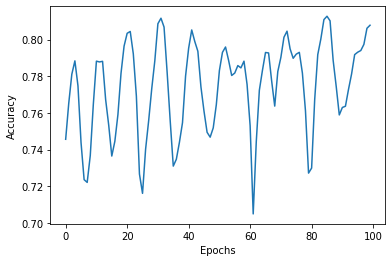

In [16]:
history=model.history
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Create Your Own Poem

In [18]:
size=int(input("Enter size of poem to generate(words):"))
start=input("Enter Starting Words for your poem:")
decoder=dict([(v,k) for (k,v) in tokenizer.word_index.items()])
next_words=size-len(start.split())
count=0
print("\n...Generating Poem...\n")
for _ in range(next_words):
    tokens=tokenizer.texts_to_sequences([start])[0]
    pad=pad_sequences([tokens],maxlen=max_length-1)
    word_token=model.predict_classes(pad,verbose=0)[0]
    #print(word_token)
    word=decoder[word_token]
    start+=" "+word
    if count>10:
        count=0
        start+=",\n"
    count+=1
print(start+"...")

Enter size of poem to generate(words): 200
Enter Starting Words for your poem: hello



...Generating Poem...

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
hello on the windswept harbour wall surely hear you can hear the wind,
 high had sons love love return and gone and left me,
 by care love love return back of ban new hear me,
 bond all away your eyes there your solemn transparently gone gone,
 away and your love and love be love and ill love,
 be lazy and mussels alive alive alive and alive alive o,
 railroad sinking eyes you treasures with visit love and ill love,
 be love and your courteous da da da da dying lamenting,
 stood and gone eyes gone and gone gone love and gone,
 love and bravry will warm with warning heartfrom joys o inheritance,
 died and they died and gone and gone an